**TASK-5:- CREDIT CARD FRAUD DETECTION**

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

**IMPORTING DATA**

In [2]:
df=pd.read_csv("D:\MITUL\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Exploratory Data Analysis (EDA)**

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**THE DATA IS ALREADY CLEAN, IT DOESN'T CONTAIN ANY NULL VALUE.**

**VISUALIZING DATA USING HEATMAP**

Text(0.5, 1.0, 'Correlation using heatmap')

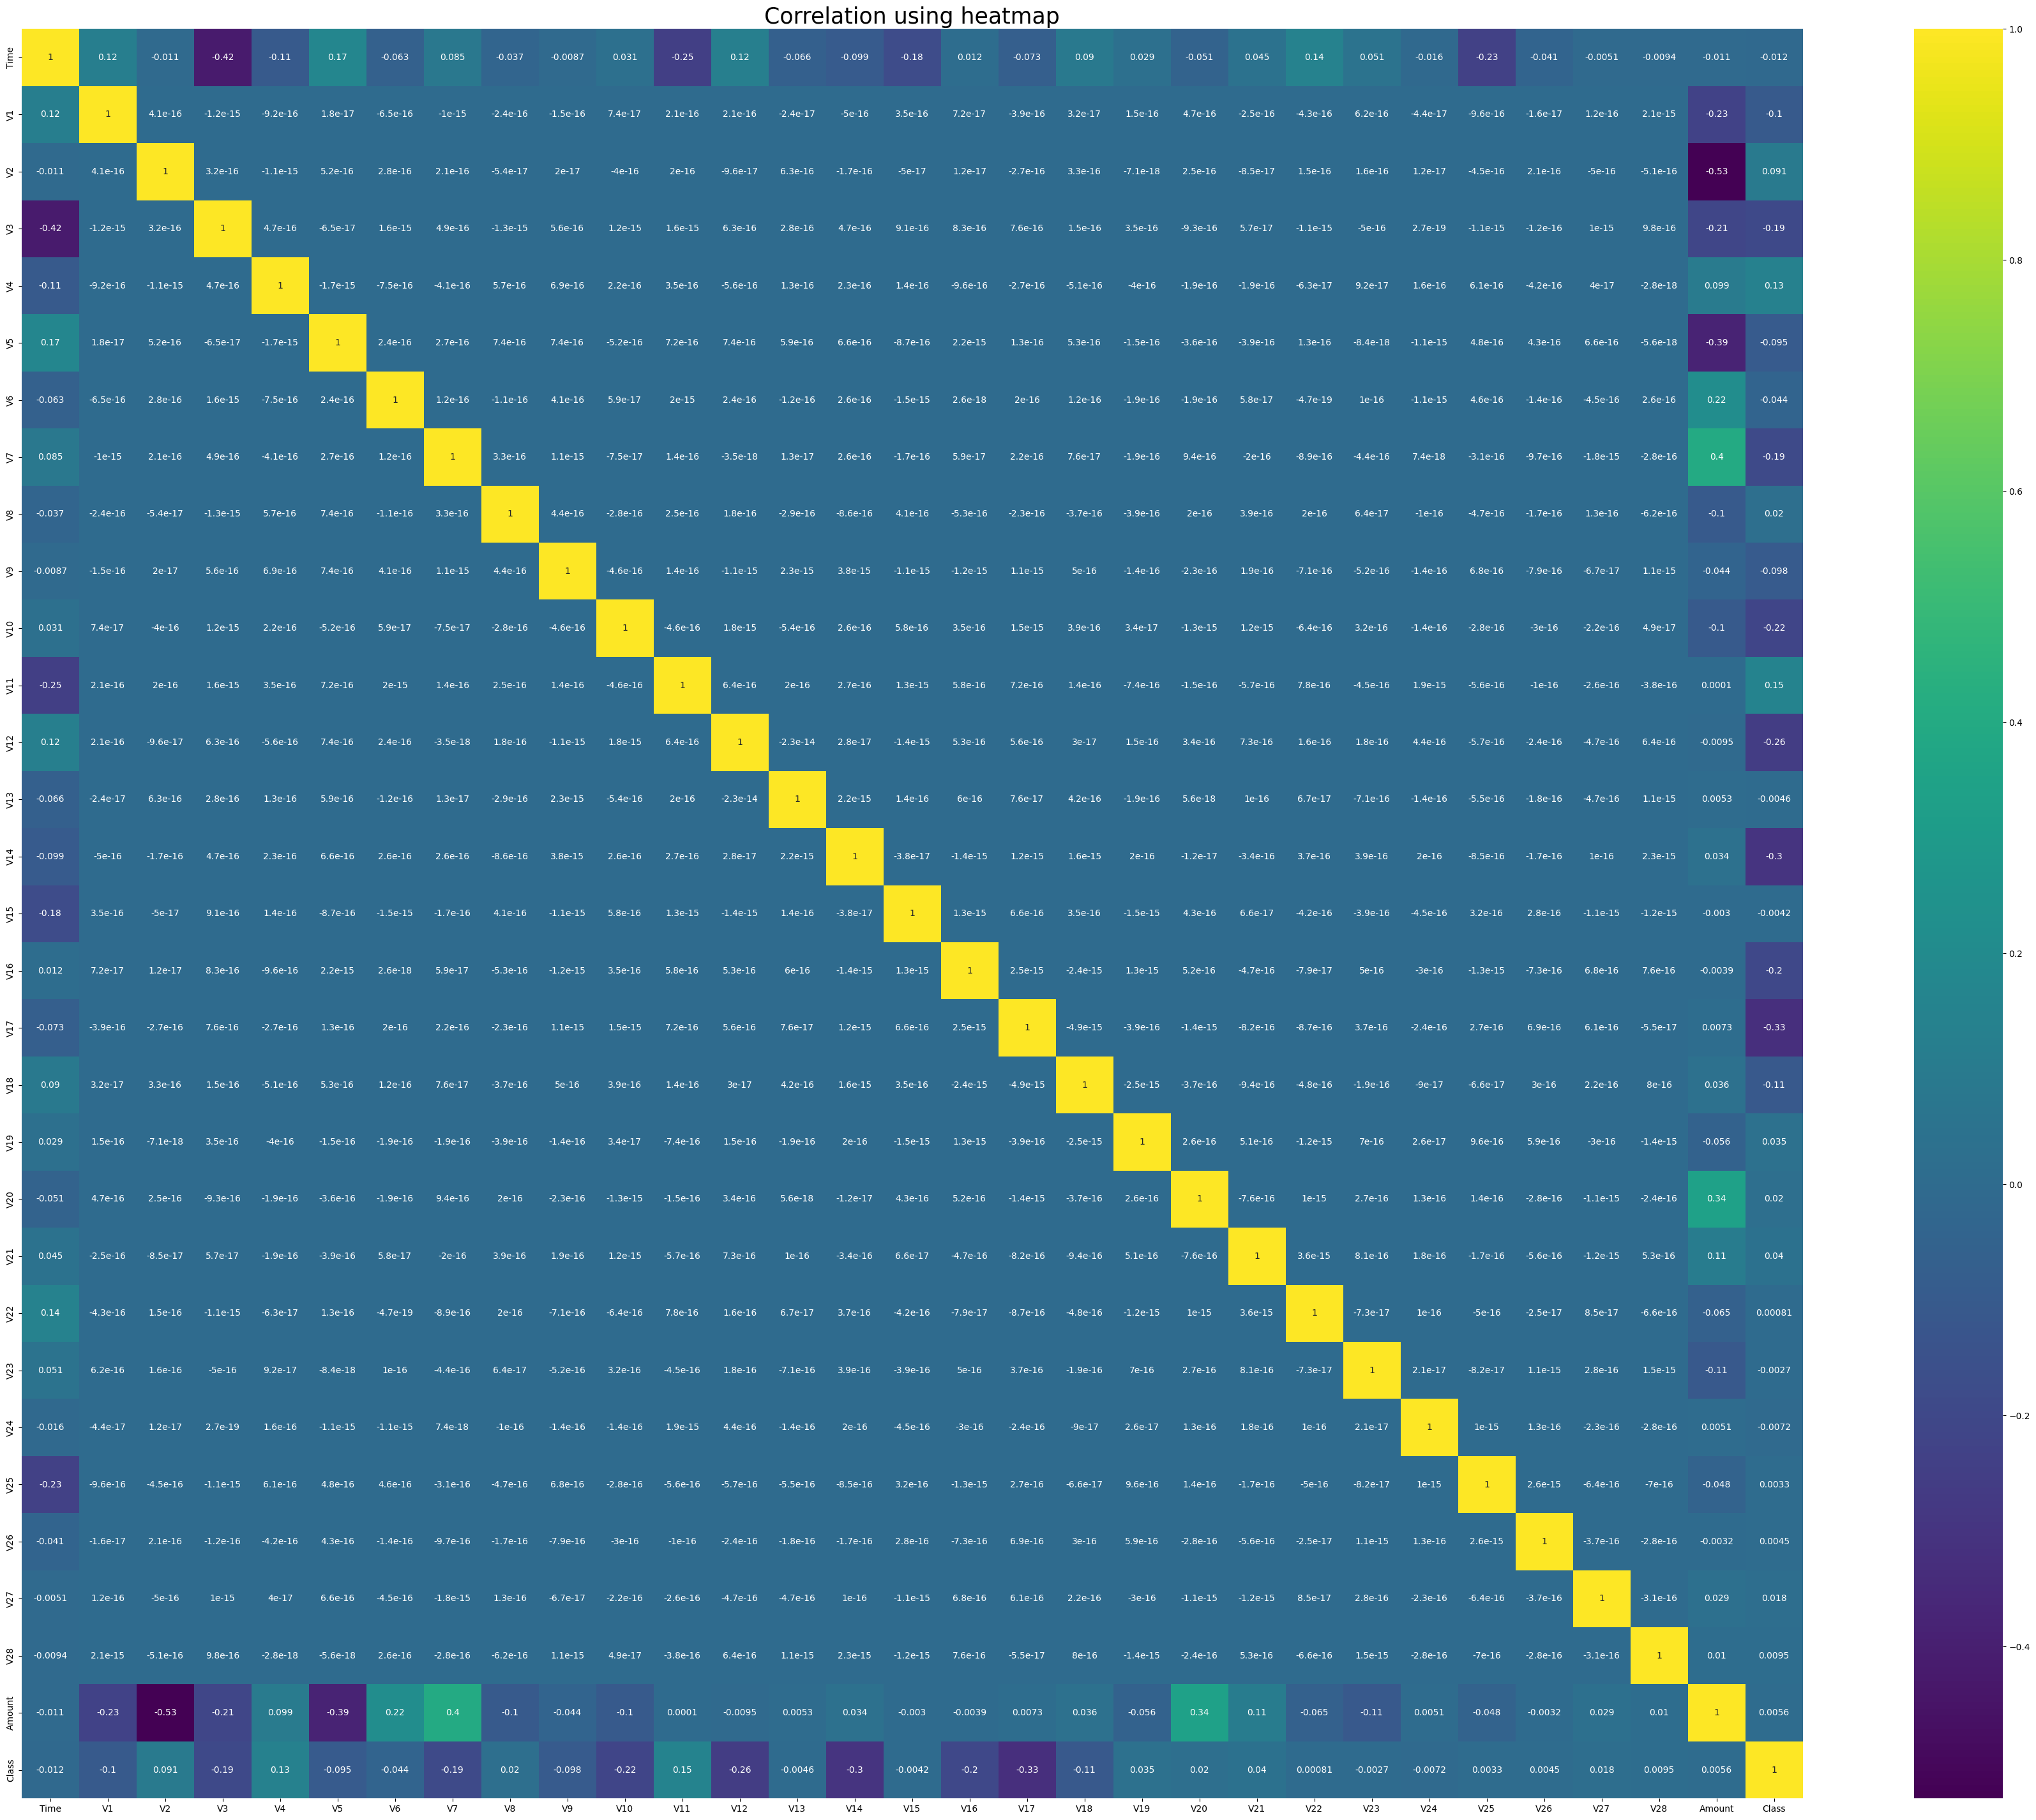

In [6]:
mp.figure(figsize=(45,36))
sb.heatmap(df.corr(),annot=True,cmap='viridis')
mp.title('Correlation using heatmap',fontsize=25)

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**THIS DATA IS HIGHLY UNBALANCED, TO MAKE IT BALANCE WE USE RandomOverSampler**

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
X=df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=df['Class']

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_balanced,y_balanced=ros.fit_resample(X,y)

In [11]:
x_balanced.shape

(568630, 30)

In [12]:
y_balanced.shape

(568630,)

In [13]:
y_balanced.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

**Here 0 means there is no fraud. 1 indicates there is a fraud**

**SPLITTING DATA FOR TRANING AND TESTING**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=42)

In [15]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,102489.0,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,...,1.264954,1.089084,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,104.00
424048,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31
409855,88672.0,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,...,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1.18
90244,62934.0,-1.119211,-0.076681,2.532709,0.480750,-0.939219,0.296271,-0.722636,0.130148,1.505440,...,-0.184620,0.016087,0.576419,-0.172156,0.554262,-0.706867,1.076114,-0.329812,0.256419,24.33
175414,122324.0,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,-0.153145,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,1.79


In [16]:
y_train.head()

373474    1
424048    1
409855    1
90244     0
175414    0
Name: Class, dtype: int64

**fitting the data using Logisticregression**

In [17]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
a=log.fit(X_train,y_train)

**predicting the data**

In [18]:
predict=log.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [19]:
y_test.head()

437378    1
504222    1
4794      0
388411    1
424512    1
Name: Class, dtype: int64

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(predict,y_test)
mse=mean_squared_error(predict,y_test)
print(mae,mse)

0.06335402634401983 0.06335402634401983


**checking the accuracy of the predicted data**

In [21]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(predict,y_test)

0.7459599808448386

In [22]:
accuracy_score(predict,y_test)

0.9366459736559801

**CONCLUSION:- The credit card fraud detection model demonstrated a strong ability to correctly classify transactions with an accuracy of 93.66%. The model's performance is further validated by low error rates, with a mean squared error and mean absolute error of 0.0633. This suggests that the model is precise in its predictions and minimizes both the overall squared error and the average magnitude of errors. The high accuracy and low error metrics indicate that the model is effective in distinguishing between legitimate and fraudulent transactions, making it a valuable tool for financial institutions to mitigate fraud risks.**